In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import library
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical # Instead, use to_categorical for one-hot encoding
import tensorflow as tf
import numpy as np
import cv2
import os

In [ ]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='/content/drive/MyDrive/VNFoods_prediction/Images/Train',
                                                 shuffle=True,
                                                 target_size=(160, 160),
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='/content/drive/MyDrive/VNFoods_prediction/Images/Validate',
                                                 shuffle=True,
                                                 target_size=(160, 160),
                                                 subset="validation",
                                                 class_mode='categorical')

Found 14077 images belonging to 30 classes.
Found 491 images belonging to 30 classes.


In [ ]:
# X_train.shape, y_train.shape,X_test.shape,y_test.shape
train_dataset.classes
train_dataset.class_indices

{'Banh beo': 0,
 'Banh bot loc': 1,
 'Banh can': 2,
 'Banh canh': 3,
 'Banh chung': 4,
 'Banh cuon': 5,
 'Banh duc': 6,
 'Banh gio': 7,
 'Banh khot': 8,
 'Banh mi': 9,
 'Banh pia': 10,
 'Banh tet': 11,
 'Banh trang nuong': 12,
 'Banh xeo': 13,
 'Bun bo Hue': 14,
 'Bun dau mam tom': 15,
 'Bun mam': 16,
 'Bun rieu': 17,
 'Bun thit nuong': 18,
 'Ca kho to': 19,
 'Canh chua': 20,
 'Cao lau': 21,
 'Chao long': 22,
 'Com tam': 23,
 'Goi cuon': 24,
 'Hu tieu': 25,
 'Mi quang': 26,
 'Nem chua': 27,
 'Pho': 28,
 'Xoi xeo': 29}

In [ ]:
import numpy as np  #
import pandas as pd # xu ly mang
import seaborn as sns # do thi
import matplotlib.pyplot as plt # ve do hoa
from sklearn.preprocessing import StandardScaler  # xu ly du lieu , du lieu k dong deu
from sklearn.model_selection import train_test_split # chia du lieu
from keras.layers import Dense,Activation,Dropout,BatchNormalization,LSTM #  :batch... : chuan cua ANN
from keras.models import Sequential #
from tensorflow.keras.utils import to_categorical #  de dam bao do hcinh xac cao
from keras import callbacks #
from sklearn .metrics import  precision_score,recall_score, confusion_matrix, classification_report, accuracy_score,f1_score # thu vien cho do luong

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model

def build_mobilenet_model(input_shape=(160, 160, 3), num_classes=30, dropout_rate=0.3):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze phần pre-trained

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(150, activation='relu')(x)
    x = Dropout(0.3)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
model = build_mobilenet_model(num_classes=30, input_shape=(160, 160, 3), dropout_rate=0.3)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Tạo mô hinh
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
#model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(160, 160,3))) # 32 lần tích chập
#model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
#model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(160, 160,3))) # 64 lần tích chập
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) # 128 lần tích chập
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Dùng CNN tách biên và giờ quay trở loại ANN để phân loại
#from keras.layers.convolutional import Conv2D, MaxPooling2D # This line caused the error, the convolutional module doesn't exist anymore.
from keras.layers import Conv2D, MaxPooling2D # Import directly from keras.layers

from keras.layers import Dense, Activation, Flatten


model.add(Flatten())
model.add(Dense(150,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(30,activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 160, 160, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 160, 160, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 80, 80, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 80, 80, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 80, 80, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 40, 40, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 204800)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 150)            │    30,720,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 30)             │         4,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,984,840 (118.20 MB)

 Trainable params: 30,984,840 (118.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model .compile(optimizer = opt, loss ='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

EarlyStopping = callbacks.EarlyStopping(monitor='accuracy',
                                        patience=5,
                                        verbose=1,
                                        mode='max')
callbacks = [
    EarlyStopping,
    ModelCheckpoint(filepath='/content/drive/MyDrive/VNFoods_prediction/best_model.h5', save_best_only=True)
]

In [ ]:
#history = model.fit(train_dataset,batch_size=32,epochs=30,verbose=1,validation_data=validation_dataset, callbacks=[EarlyStopping])
history = model.fit(train_dataset,batch_size=32,epochs=30,verbose=1,validation_data=validation_dataset, callbacks=callbacks)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.0512 - loss: 3.4742 

440/440 ━━━━━━━━━━━━━━━━━━━━ 7436s 17s/step - accuracy: 0.0512 - loss: 3.4740 - val_accuracy: 0.0876 - val_loss: 3.3035
Epoch 2/30
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - accuracy: 0.0819 - loss: 3.2973

440/440 ━━━━━━━━━━━━━━━━━━━━ 218s 494ms/step - accuracy: 0.0819 - loss: 3.2973 - val_accuracy: 0.1161 - val_loss: 3.2304
Epoch 3/30
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step - accuracy: 0.1126 - loss: 3.2441

440/440 ━━━━━━━━━━━━━━━━━━━━ 217s 493ms/step - accuracy: 0.1126 - loss: 3.2440 - val_accuracy: 0.1242 - val_loss: 3.1843
Epoch 4/30
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step - accuracy: 0.1286 - loss: 3.1639

440/440 ━━━━━━━━━━━━━━━━━━━━ 213s 484ms/step - accuracy: 0.1286 - loss: 3.1639 - val_accuracy: 0.1324 - val_loss: 3.0895
Epoch 5/30
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.1473 - loss: 3.0527

440/440 ━━━━━━━━━━━━━━━━━━━━ 210s 478ms/step - accuracy: 0.1473 - loss: 3.0527 - val_accuracy: 0.1813 - val_loss: 3.0004
Epoch 6/30
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - accuracy: 0.1819 - loss: 2.9142

440/440 ━━━━━━━━━━━━━━━━━━━━ 212s 479ms/step - accuracy: 0.1819 - loss: 2.9142 - val_accuracy: 0.1976 - val_loss: 2.8590
Epoch 7/30
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.2012 - loss: 2.7698

440/440 ━━━━━━━━━━━━━━━━━━━━ 252s 459ms/step - accuracy: 0.2012 - loss: 2.7698 - val_accuracy: 0.2261 - val_loss: 2.7478
Epoch 8/30
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - accuracy: 0.2525 - loss: 2.5867

440/440 ━━━━━━━━━━━━━━━━━━━━ 206s 466ms/step - accuracy: 0.2525 - loss: 2.5867 - val_accuracy: 0.2546 - val_loss: 2.6786
Epoch 9/30
440/440 ━━━━━━━━━━━━━━━━━━━━ 252s 444ms/step - accuracy: 0.3250 - loss: 2.2849 - val_accuracy: 0.2322 - val_loss: 2.6973
Epoch 10/30
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.4152 - loss: 1.9674

440/440 ━━━━━━━━━━━━━━━━━━━━ 197s 447ms/step - accuracy: 0.4151 - loss: 1.9675 - val_accuracy: 0.2363 - val_loss: 2.6491
Epoch 11/30
440/440 ━━━━━━━━━━━━━━━━━━━━ 203s 460ms/step - accuracy: 0.5052 - loss: 1.6166 - val_accuracy: 0.2485 - val_loss: 2.7684
Epoch 12/30
440/440 ━━━━━━━━━━━━━━━━━━━━ 197s 448ms/step - accuracy: 0.6070 - loss: 1.2604 - val_accuracy: 0.2648 - val_loss: 2.8650
Epoch 13/30
440/440 ━━━━━━━━━━━━━━━━━━━━ 198s 449ms/step - accuracy: 0.6939 - loss: 0.9669 - val_accuracy: 0.2403 - val_loss: 3.1039
Epoch 14/30
440/440 ━━━━━━━━━━━━━━━━━━━━ 201s 456ms/step - accuracy: 0.7653 - loss: 0.7281 - val_accuracy: 0.2546 - val_loss: 3.3720
Epoch 15/30
440/440 ━━━━━━━━━━━━━━━━━━━━ 203s 460ms/step - accuracy: 0.8080 - loss: 0.6034 - val_accuracy: 0.2464 - val_loss: 3.4614
Epoch 16/30
440/440 ━━━━━━━━━━━━━━━━━━━━ 196s 444ms/step - accuracy: 0.8489 - loss: 0.4724 - val_accuracy: 0.2546 - val_loss: 3.8661
Epoch 17/30
440/440 ━━━━━━━━━━━━━━━━━━━━ 195s 444ms/step - accuracy: 0.8696 - los

In [ ]:
predict_model = model.save('/content/drive/MyDrive/VNFoods_prediction/30VietNamese_Food_PreTrained_Prediction_GPU_2.h5')

In [ ]:
predict_model = tf.keras.models.load_model('/content/drive/MyDrive/VNFoods_prediction/30VietNamese_Food_PreTrained_Prediction_GPU_2.h5')

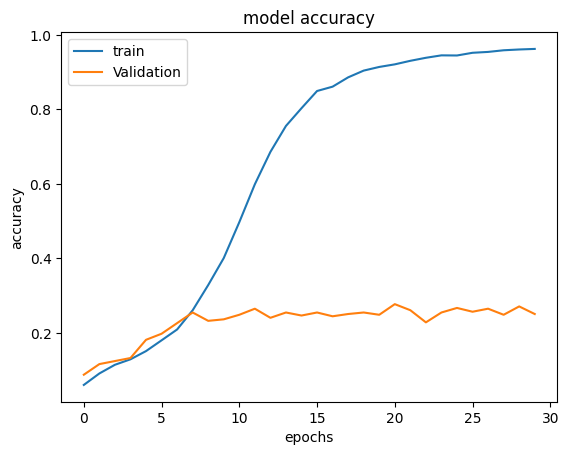

In [ ]:
# vẽ lại quá trình học
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [ ]:
#in sai so va do chinh xac
score = model.evaluate(validation_dataset,verbose=0)
print('Sai số : ',score[0])
print('Độ chính xác ',score[1])

Sai số :  5.016284942626953
Độ chính xác  0.2505091726779938


In [ ]:
test_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='/content/drive/MyDrive/VNFoods_prediction/Images/Test',
                                                 shuffle=True,
                                                 target_size=(160, 160),
                                                 #subset="test",
                                                 class_mode='categorical')

Found 5040 images belonging to 30 classes.


In [ ]:
#in sai so va do chinh xac
score1 = model.evaluate(test_dataset)
print('Sai số : ',score1[0])
print('Độ chính xác ',score1[1])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


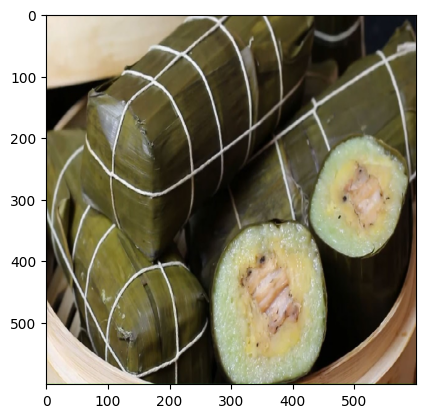

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "/content/BanhTetVN.jpg"

img = load_img(filename,target_size=(224,224))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,224,224,3)
img = img.astype('float32')
img = img/255

In [ ]:

kq=np.argmax(predict_model.predict(img),axis=-1)
if(kq==0):
    print("banh chung")
if(kq==1):
    print("Banh mi")
if(kq==2):
    print("Bun dau mam tom")
if(kq==3):
    print("Bun thit nuong")
if(kq==4):
    print("Ca kho to")
if(kq==5):
    print("Canh chua")
if(kq==6):
    print("Chao long")
if(kq==7):
    print("Com tam")
if(kq==8):
    print("Goi cuon")
if(kq==9):
    print("Pho")
else :
  print("None")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
None


In [ ]:
kq

array([11])

In [ ]:
!free -h

               total        used        free      shared  buff/cache   available
Mem:            12Gi       906Mi       7.1Gi       1.0Mi       4.7Gi        11Gi
Swap:             0B          0B          0B


In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         113G   38G   76G  34% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.2G  775M  61% /usr/sbin/docker-init
tmpfs           6.4G   64K  6.4G   1% /var/colab
/dev/sda1        92G   67G   25G  74% /kaggle/input
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [ ]:
!nvidia-smi

Mon May  5 05:42:22 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   58C    P0             28W /   70W |    3710MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----